In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('heartdisease_data.csv', names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
df = df.replace('?',np.nan)

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64


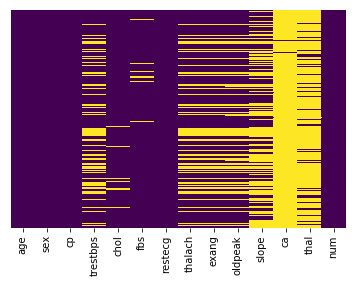

In [6]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cmap = 'viridis',yticklabels = False, cbar = False)

In [7]:
df = df.drop(['slope','ca','thal'],axis = 1)

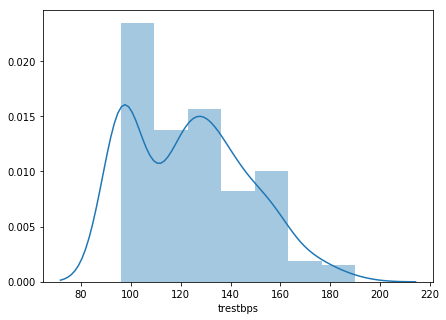

In [8]:
plt.figure(figsize = (7,5))
df['trestbps']=df['trestbps'].replace(np.nan, 0)
df['trestbps']=df['trestbps'].astype(float)
df['trestbps']=df['trestbps'].replace(0,df['trestbps'].mean() )
sns.distplot(df['trestbps'])

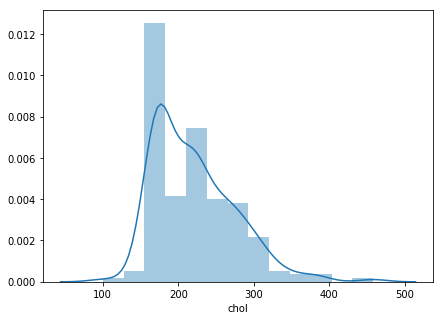

In [9]:
plt.figure(figsize = (7,5))
df['chol']=df['chol'].replace(np.nan, 0)
df['chol']=df['chol'].astype(float)
df['chol']=df['chol'].replace(0,df['chol'].mean() )
sns.distplot(df['chol'])

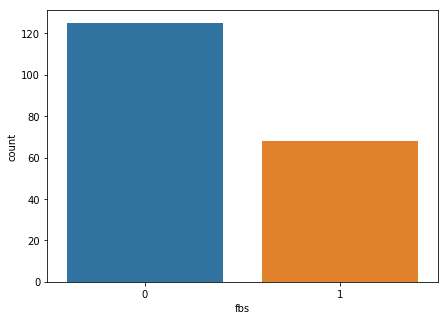

In [10]:
plt.figure(figsize = (7,5))
sns.countplot(df['fbs'])

In [11]:
df['fbs']=df['fbs'].fillna(0)
df['fbs']=df['fbs'].astype(int)

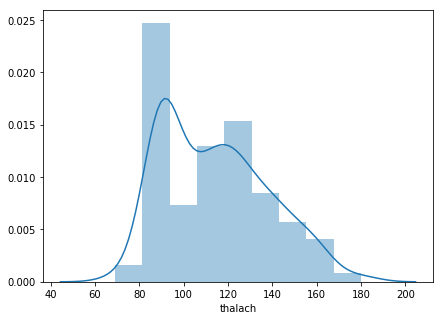

In [12]:
plt.figure(figsize = (7,5))
df['thalach']=df['thalach'].replace(np.nan, 0)
df['thalach']=df['thalach'].astype(float)
df['thalach']=df['thalach'].replace(0,df['thalach'].mean() )
sns.distplot(df['thalach'])

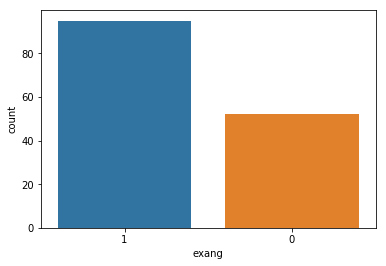

In [13]:
sns.countplot(df['exang'])

In [14]:
#treating the missing value as another category
df['exang']=df['exang'].replace(np.nan,2)
df['exang']=df['exang'].astype(int)

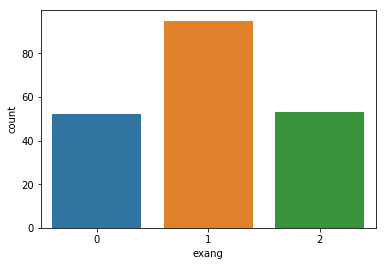

In [15]:
sns.countplot(df['exang'])

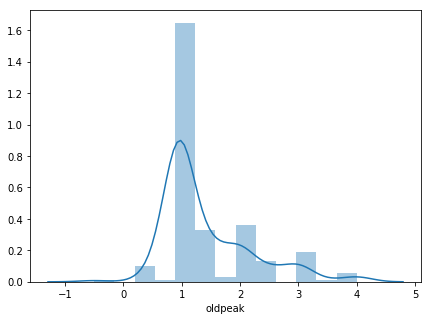

In [16]:
plt.figure(figsize = (7,5))
df['oldpeak']=df['oldpeak'].replace(np.nan, 0)
df['oldpeak']=df['oldpeak'].astype(float)
df['oldpeak']=df['oldpeak'].replace(0,df['oldpeak'].mean() )
sns.distplot(df['oldpeak'])

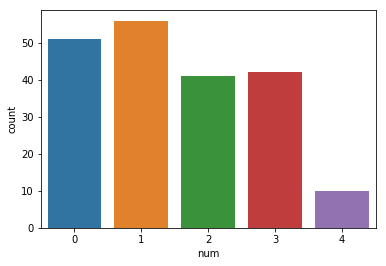

In [17]:
#Target variable
sns.countplot(df['num'])

Model building

In [18]:
X = df.drop('num',axis=1)     
Y = df['num']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

C:\Users\puneeth\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


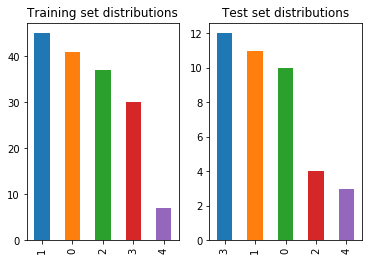

In [20]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')
plt.subplot(1,2,1).title.set_text('Training set distributions')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2).title.set_text('Test set distributions')

plt.show()

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000)

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)


Accuracy of Logistic regression model is 25.0%


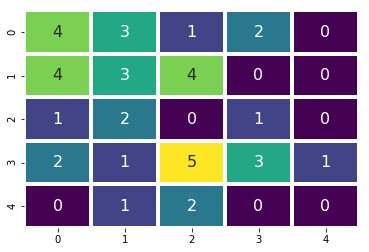

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[0,1,2,3,4])
sns.heatmap(cm_lr, annot= True, yticklabels = [0,1,2,3,4], xticklabels = [0,1,2,3,4], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)

print("")

print("Accuracy of Logistic regression model is {}%".format(accuracy_score(y_test, y_predict_lr)*100))

K-Nearest Neighbours

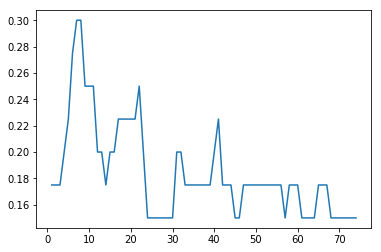

In [23]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,75):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,75),scores)

In [24]:
model_KNN = KNeighborsClassifier(n_neighbors = 7)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Accuracy of K-Nearest Neighbours model is 25.0%


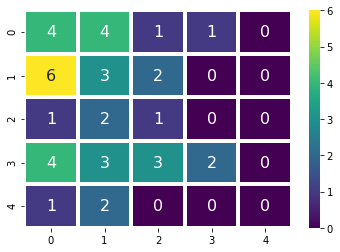

In [ ]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[0,1,2,3,4])
sns.heatmap(cm_knn, annot= True, yticklabels = [0,1,2,3,4], xticklabels = [0,1,2,3,4], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_KNN)*100))

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_rfcl = RandomForestClassifier()

param_grid_rfcl = {'max_features': list(range(1,11)) , 'max_depth':list(range(1,11))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_rfcl,param_grid_rfcl,cv=10)

gs.fit(x_train, y_train)

gs.best_params_

C:\Users\puneeth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
model_rfcl = RandomForestClassifier(max_depth=8, max_features= 1)

model_rfcl.fit(x_train, y_train)

y_predict_rfcl= model_rfcl.predict(x_test)

In [ ]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0,1,2,3,4])
sns.heatmap(cm_rfcl, annot= True, yticklabels = [0,1,2,3,4], xticklabels = [0,1,2,3,4], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_rfcl)*100))

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param_grid_dt = {'max_features': list(range(1,11)) , 'max_depth':list(range(1,11))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_dt,param_grid_dt,cv=10)

gs.fit(x_train, y_train)

gs.best_params_

In [ ]:
model_dt = RandomForestClassifier(max_depth=7, max_features= 2)

model_dt.fit(x_train, y_train)

y_predict_dt= model_dt.predict(x_test)

In [ ]:
cm_dt = metrics.confusion_matrix(y_test, y_predict_dt,labels=[0,1,2,3,4])
sns.heatmap(cm_dt, annot= True, yticklabels = [0,1,2,3,4], xticklabels = [0,1,2,3,4], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_dt)*100))

Random forest turned out to be the best classifer with 32.5 % accuracy